In [1]:
from classes import *
import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle
import random
import ruptures as rpt

from tqdm.notebook import trange, tqdm

In [2]:
#Load the experiments
input_path = "temp/experiments/experiment_2020_9_21.p"
output_path = os.path.dirname(input_path)
experiments = pickle.load( open( input_path, "rb" ) )
print(len(experiments))

720


In [21]:
window = 4 #The size of the rolling window
margin = 2 # The margin around the TP

#Criteria
c1 = 0.15*350_000 #TODO: make different per RA (300,000 and 350,000)
c2 = 1e10 #variance
c3 = 10 #percent

with tqdm(total=len(experiments)) as pbar:
    for experiment in experiments:
        experiment.create_Metrics() #TODO: GIVE CONTROL OVER THE METRICS TO BE CREATED
        for M in experiment.allMetrics:
            M.create_statistics() #Create summary statistics for the metric(t)
            M.select_candidates(c1=c1,c2=c2,c3=c3,window=window,margin=margin) #Evaluate the three tipping point criteria
            M.first_SETP = M.candidates['rapid change'].first_valid_index() #The first year in which a rapid change is found
        pbar.update(1)
            #M.plot_both(figsize=(15,20),exp_name=experiment.name)

D:\Python\Urban-SETP\classes.py:860: RuntimeWarning: divide by zero encountered in double_scalars
  perc = 100*(avg_a-avg_b)/avg_a
D:\Python\Urban-SETP\classes.py:860: RuntimeWarning: invalid value encountered in double_scalars
  perc = 100*(avg_a-avg_b)/avg_a


In [23]:
experiment.allMetrics

[Area_A_house_price_obj,
 Area_A_house_price_subj,
 Area_B_house_price_obj,
 Area_B_house_price_subj]

### Select an interesting metric to improve the signal analysis

In [5]:
def sel_exp(experiments,SLR_scenarios='All',SurgeHeights='All',Mayors='All'):
    """Filter a list of experiments, based on the inputs values
    
    Arguments:
        *experiments* (list of experiment objects) : The input experiments
        *SLR_scenario* (str/list of strs) : Number referring to the SLR scenario
        *SurgeHeight* (int or string / list of ints/strings) : Number referring to the transient storm surge height scenario
        *Mayor* (str/list of strs) : Name of the mayor(s)
    
    Returns:
        *selection* (list of experiment objects) : The selected experiments
    """
    selection = experiments
    
    
    if not SLR_scenarios == 'All':
        if isinstance(SLR_scenarios,str):
            SLR_scenarios = [SLR_scenarios] #put the value in a list
        SLR_scenarios = ['Scenario_' + name for name in SLR_scenarios]
        selection = [exp for exp in experiments if exp.SurgeLevel.corresponding_SLR_Scenario.name in SLR_scenarios]
    
    if not SurgeHeights == 'All':
        if not isinstance(SurgeHeights,list):
            SurgeHeights = [SurgeHeights]
        SurgeHeights = [str(x) for x in SurgeHeights] #make them strings if they were ints
        selection = [exp for exp in selection if exp.SurgeLevel.corresponding_SurgeHeight.name in SurgeHeights]
    
    if not Mayors == 'All':
        if not isinstance(Mayors,list):
            Mayors = [Mayors]
        selection = [exp for exp in selection if exp.name.split('_')[-1] in Mayors]
    
    return selection

sel_experiments = sel_exp(experiments,['01','02'],'All',['R. Active','Sentiment'])

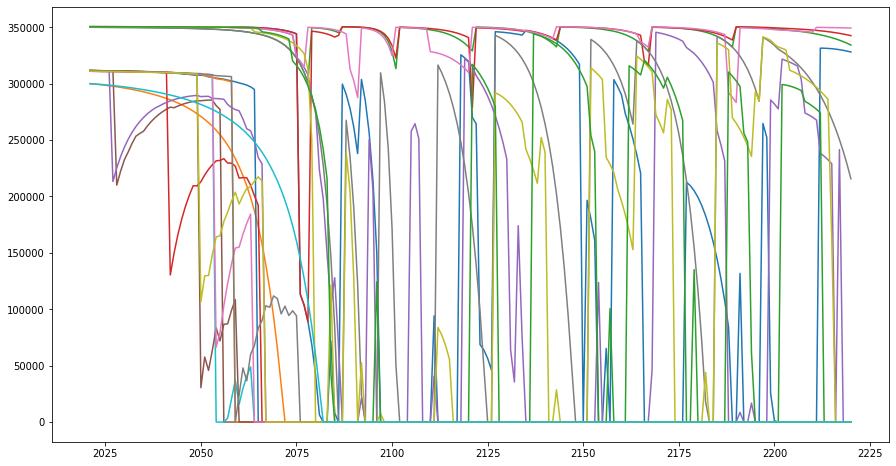

In [6]:
#Select some experiments with interesting signals

#Intereting shapes
A0_r = [1,69] #area 0 rational
A0_br = [3,5,7,9,11,15,19,45,49,59] # area 0 boundedly rational
A1_r = [1,4]
A1_br = [0,1,2,3,4,10]

M_sel = [] #List Pd Series containing interesting metrics

for i,exp in enumerate(sel_experiments):
    if i in A0_r:
        M_sel.append(exp.allMetrics[0])
    if i in A0_br:
        M_sel.append(exp.allMetrics[1])
    if i in A1_r:
        M_sel.append(exp.allMetrics[2])
    if i in A1_br:
        M_sel.append(exp.allMetrics[3])

M_sel

fig, ax = plt.subplots(figsize=(15,8))
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

for series in M_sel:
    series.raw.plot(ax=ax)

### My own approach

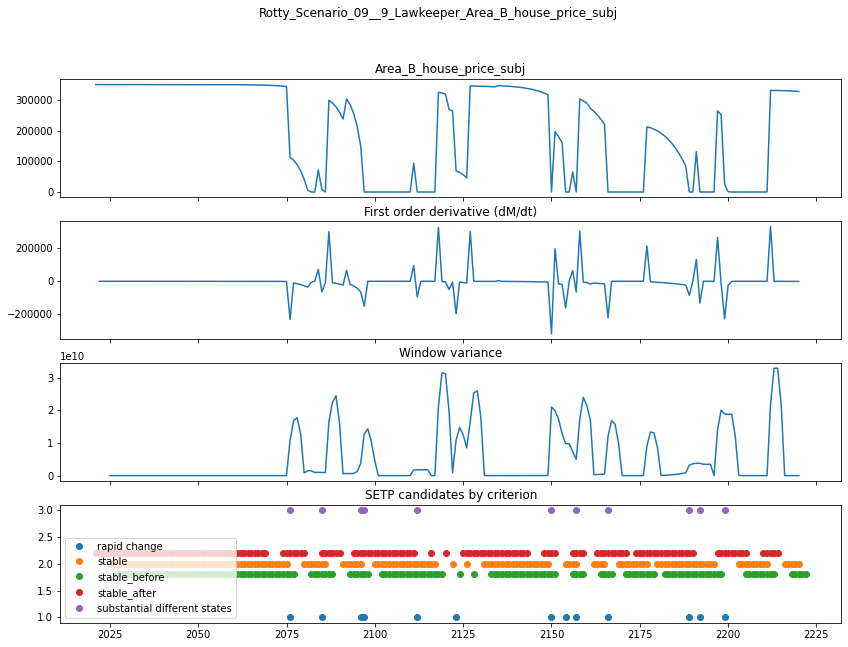

In [7]:
M = M_sel[0]



#M.create_statistics(domain=(2000,2100),window=window)
#M.select_candidates(c1=c1,c2=c2,c3=c3,window=window,margin=margin)    
M.plot_both(figsize=(14,10),exp_name=experiment.name,drop=['Second order derivative (d2M/dt2)','Window mean'])
plt.legend(loc='lower left')

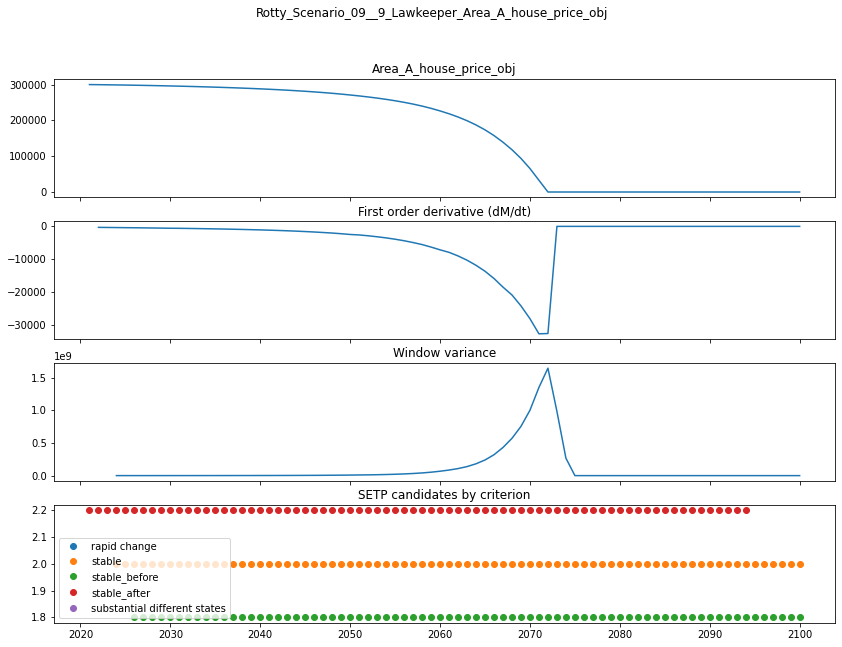

In [13]:
M = M_sel[1]

window = 4 #The size of the rolling window
margin = 2 # The margin around the TP

#Criteria
c1 = 0.15*350_000 #make different per RA (300,000 and 350,000)
c2 = 1e10 #variance
c3 = 10 #percent

M.create_statistics(domain=(2000,2100),window=window)
M.select_candidates(c1=c1,c2=c2,c3=c3,window=window,margin=margin)    
M.plot_both(figsize=(14,10),exp_name=experiment.name,drop=['Second order derivative (d2M/dt2)','Window mean'])
plt.legend(loc='lower left')

In [16]:
#Determine if this signal has a tipping point
M.candidates['rapid change'].loc[2070:2080]
M.first_SETP = M.candidates['rapid change'].first_valid_index() #The first year in which a rapid change is found

### RUPTURES - Pruned Exact Linear Time

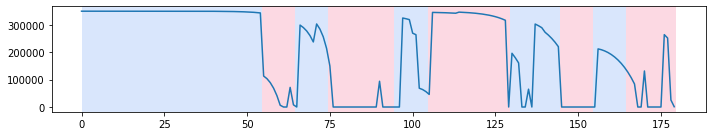

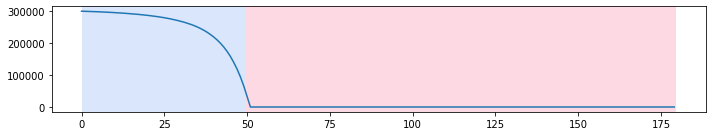

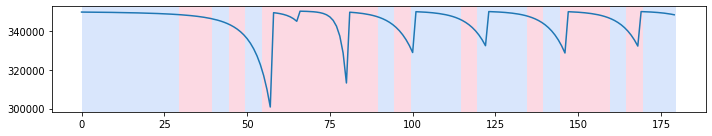

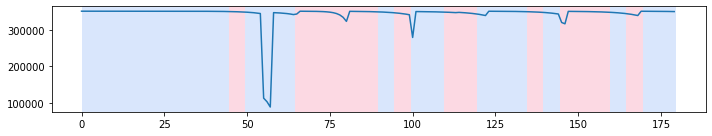

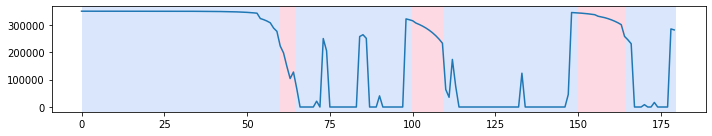

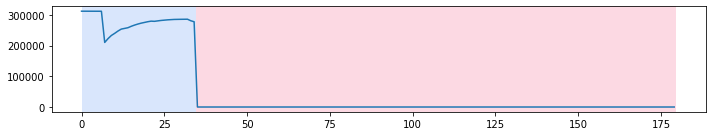

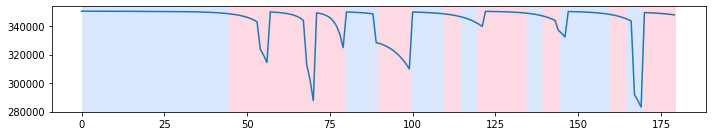

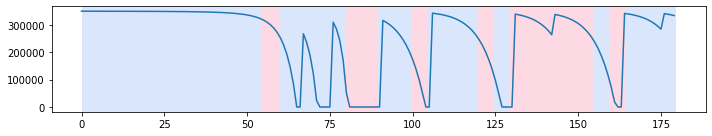

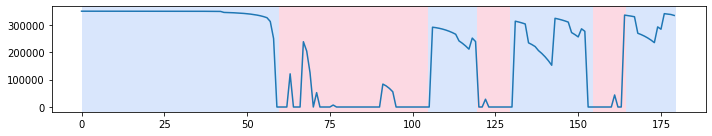

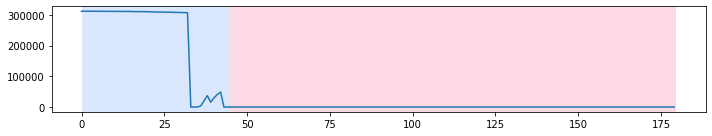

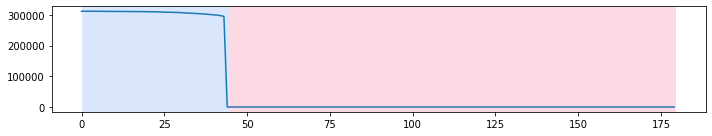

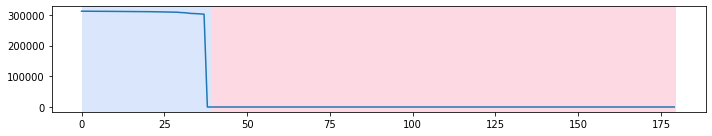

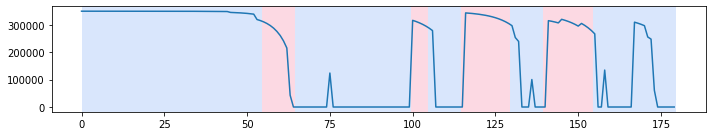

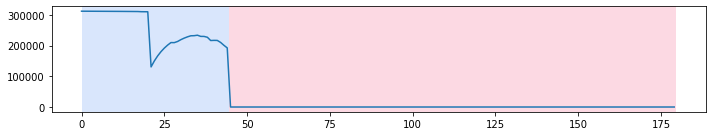

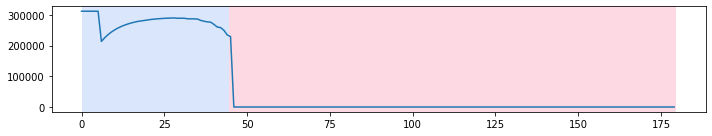

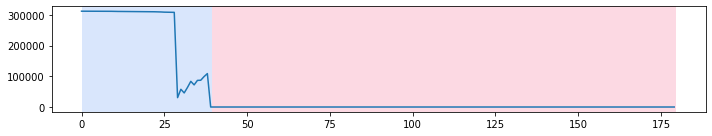

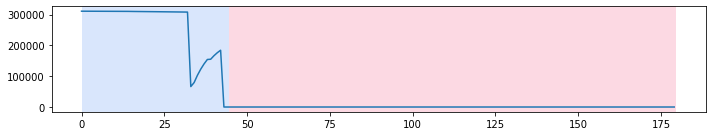

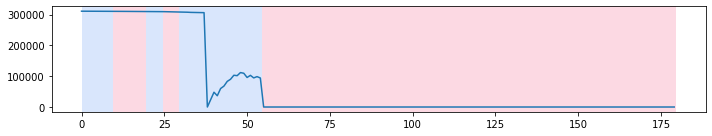

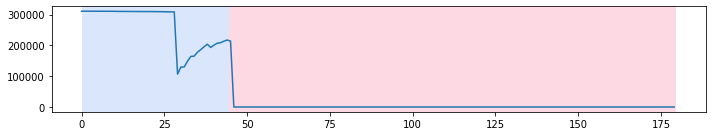

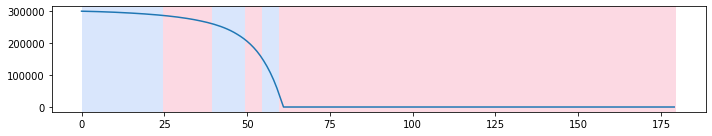

In [64]:
for series in M_sel:
    data
    #RUPTURES PACKAGE
    
    #PELT ANALYSIS Pruned Exact Linear Time
    #Signal
    signal = series.raw[0:180].values

    #Detection
    model = "rbf" # l1, l2, rbf
    min_size = 1 #minimum segement lenghts (years?)
    #jump = 80 #how big should a jump be at least (relates to t-axis???)
    pen = 2 #penalty for overfitting
    algo = rpt.Pelt(model=model,min_size=min_size).fit(signal)
    result = algo.predict(pen=pen)

    #Display
    rpt.display(signal, result)

### Binary change point detection
Documentation: https://github.com/deepcharles/ruptures/blob/master/ruptures/detection/binseg.py

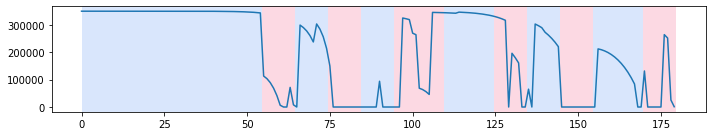

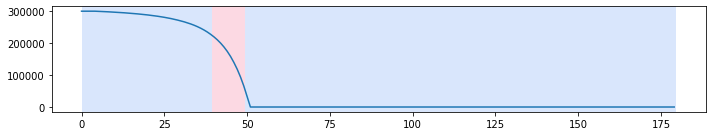

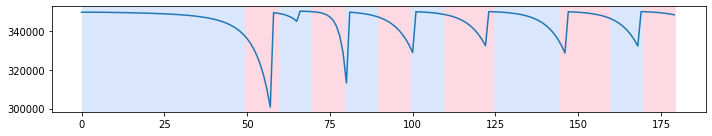

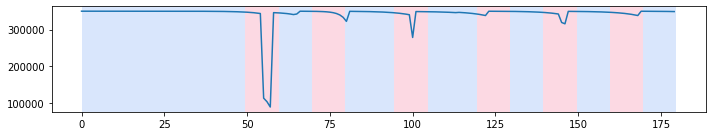

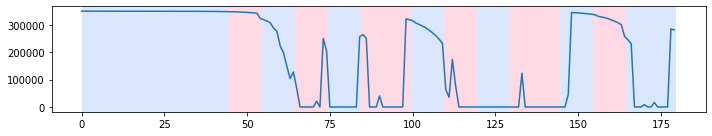

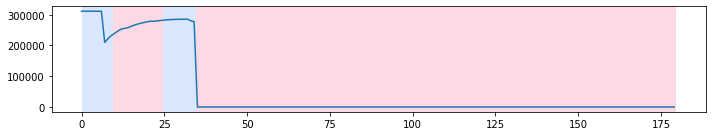

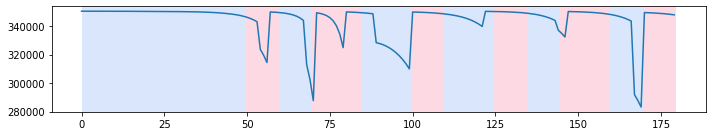

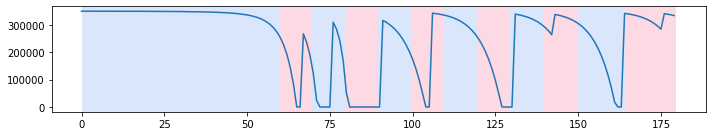

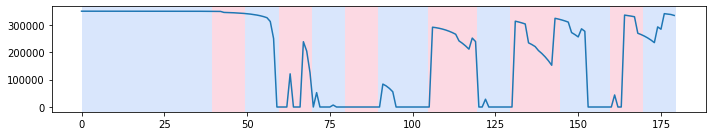

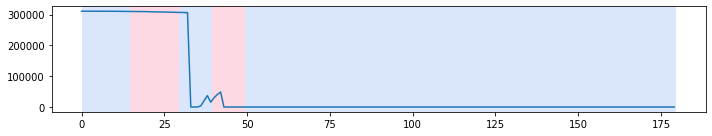

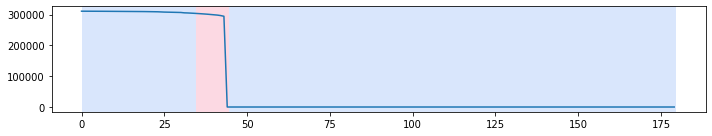

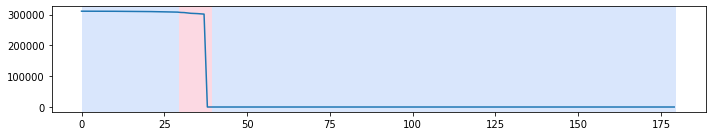

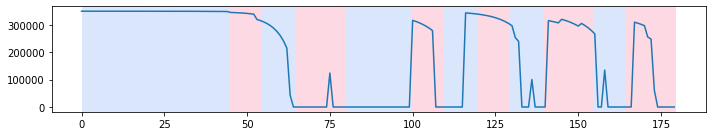

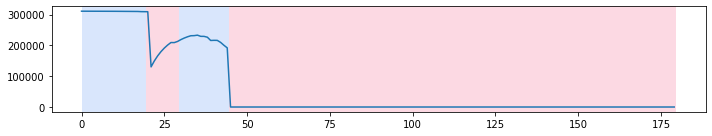

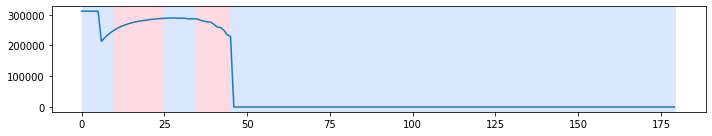

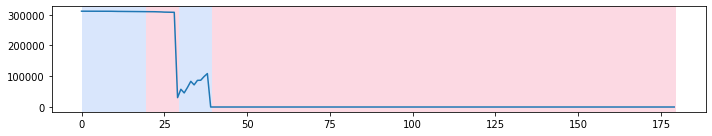

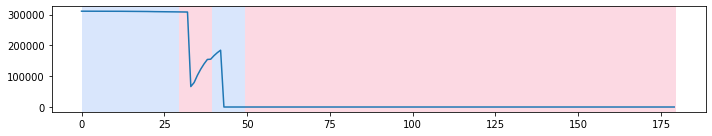

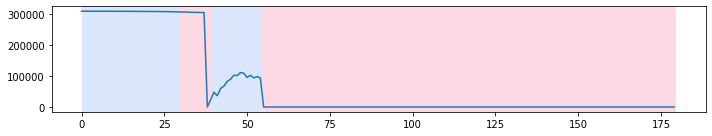

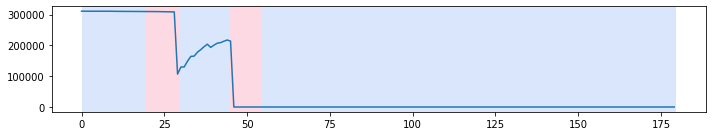

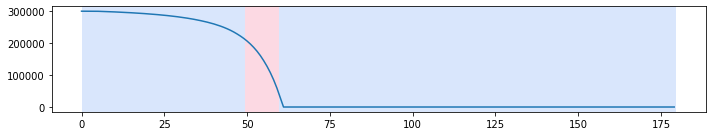

In [84]:
for series in M_sel:
    data
    #RUPTURES PACKAGE
    
    #PELT ANALYSIS
    #Signal
    signal = series.raw[0:180].values

    #Detection
    model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
    pen = 100000 #penalty for overfitting
    min_size=2
    #n_bkps = 3 #number of breakpoints to find before stopping.
    algo = rpt.Binseg(model=model,min_size=min_size).fit(signal)
    result = algo.predict(pen=pen) #n_bkps=n_bkps,

    #Display
    rpt.display(signal, result)

In [7]:
rand = random.choice(sel_experiments)
rand.allMetrics[1].plot_both(figsize=(18,20),exp_name=experiment.name)

NameError: name 'random' is not defined

In [5]:
M = experiment.allMetrics[1]
M

Area_A_house_price_subj

D:\Python\Urban-SETP\classes.py:841: RuntimeWarning: divide by zero encountered in double_scalars
  perc = 100*(avg_a-avg_b)/avg_a


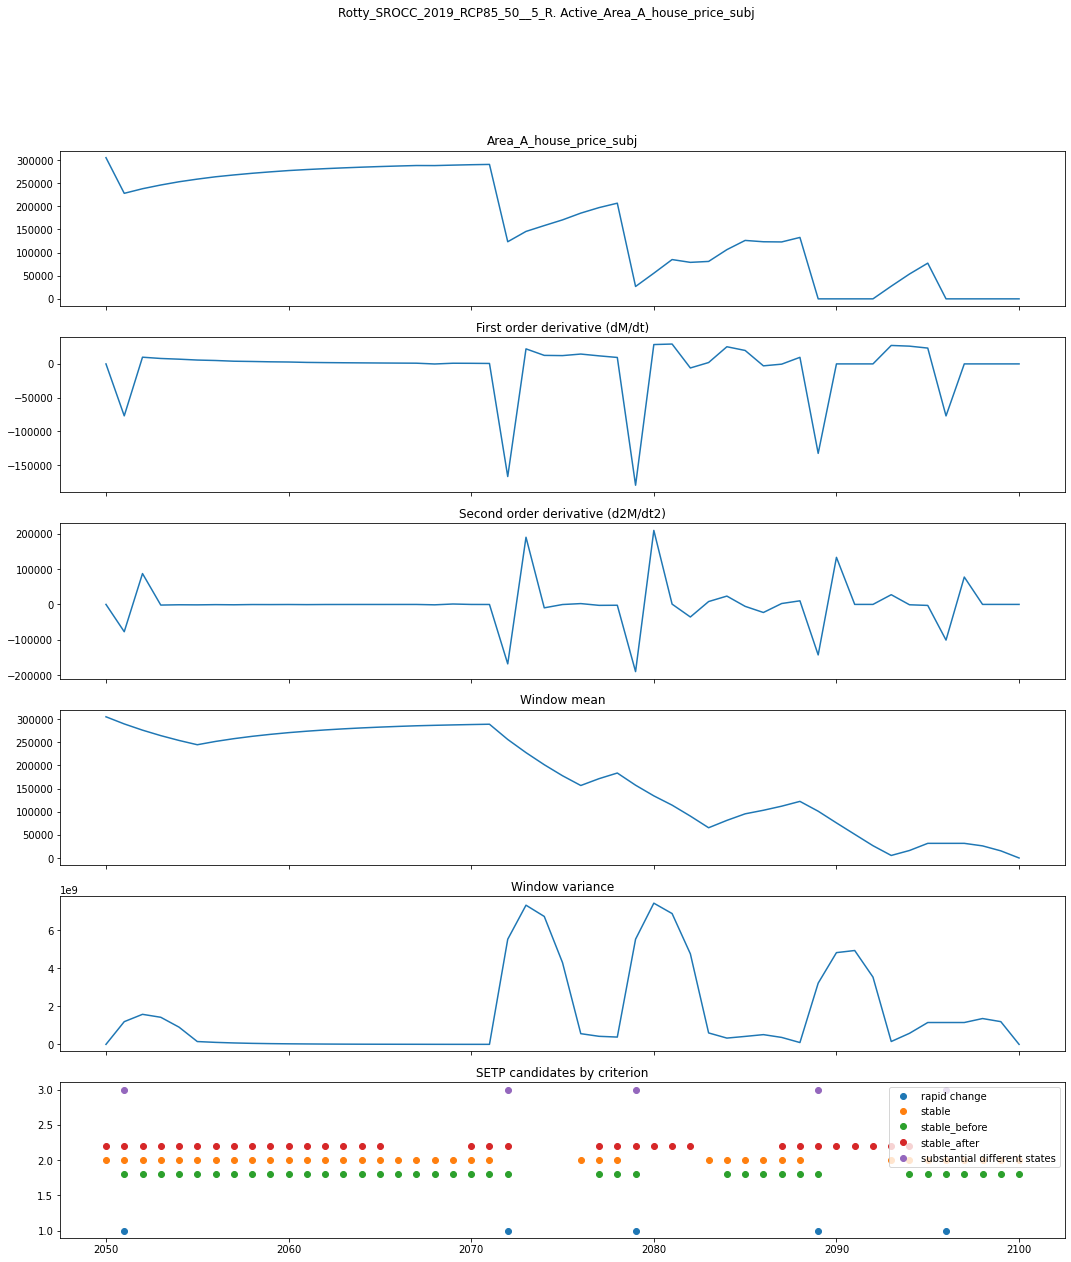

In [8]:
window = 5 #The size of the rolling window
margin = 1 # The margin around the TP
experiment.create_Metrics()
M.create_statistics(domain=(2050,2100),window=window)
M.select_candidates(window=window,margin=margin)    
M.plot_both(figsize=(18,20),exp_name=experiment.name)

### Experiment with K-means

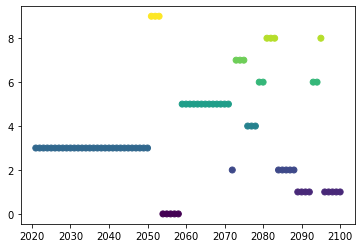

In [44]:
from sklearn.cluster import KMeans
import numpy as np
#K means Clustering 
domain = (2020,2100)

def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

series = M.raw.loc[domain[0]:domain[1]]
data = np.array(series)
data = data.reshape(-1,1)
clust_label, cent = doKmeans(data,nclust=10)
plt.scatter(series.index,clust_label,c=clust_label)